** Importing Necessary Packages **

In [1]:
import tensorflow as tf
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread
from glob import glob

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
from dataIO import pk
import cv2 as cv
import os
import matplotlib.pyplot as plt

** Loading Images **

Only showing a small set of images from the local test set we generated.

In [5]:
'''
clean_images_path = glob('./CelebA Images/Clean Images/*.png')
blurry_images_path = glob('./CelebA Images/Blurry Images/*.png')
Images = []; Blurry = []
for image, blurry in zip(clean_images_path, blurry_images_path):
    Images.append(imread(image))
    Blurry.append(imread(blurry))
Images = np.array(Images).astype('float32')
Blurry = np.array(Blurry).astype('float32')
'''

"\nclean_images_path = glob('./CelebA Images/Clean Images/*.png')\nblurry_images_path = glob('./CelebA Images/Blurry Images/*.png')\nImages = []; Blurry = []\nfor image, blurry in zip(clean_images_path, blurry_images_path):\n    Images.append(imread(image))\n    Blurry.append(imread(blurry))\nImages = np.array(Images).astype('float32')\nBlurry = np.array(Blurry).astype('float32')\n"

In [6]:
X_train = pk.load("train.gz")
X_validation = pk.load("validation.gz")
X_test = pk.load("test.gz")


Load from 'train.gz' ...
    Complete! Elapse 1.244641 sec.

Load from 'validation.gz' ...
    Complete! Elapse 0.121016 sec.

Load from 'test.gz' ...
    Complete! Elapse 0.135945 sec.


In [7]:
X_train['blur_data']=X_train['blur_data'].astype(float)
X_train['data']=X_train['data'].astype(float)
X_validation ['blur_data']=X_validation['blur_data'].astype(float)
X_validation ['data']=X_validation['data'].astype(float)
X_test ['blur_data']=X_test['blur_data'].astype(float)
X_test ['data']=X_test['data'].astype(float)


In [8]:
X_d = X_train['data']-X_train['blur_data']
X_d_val = X_validation ['data']-X_validation ['blur_data']

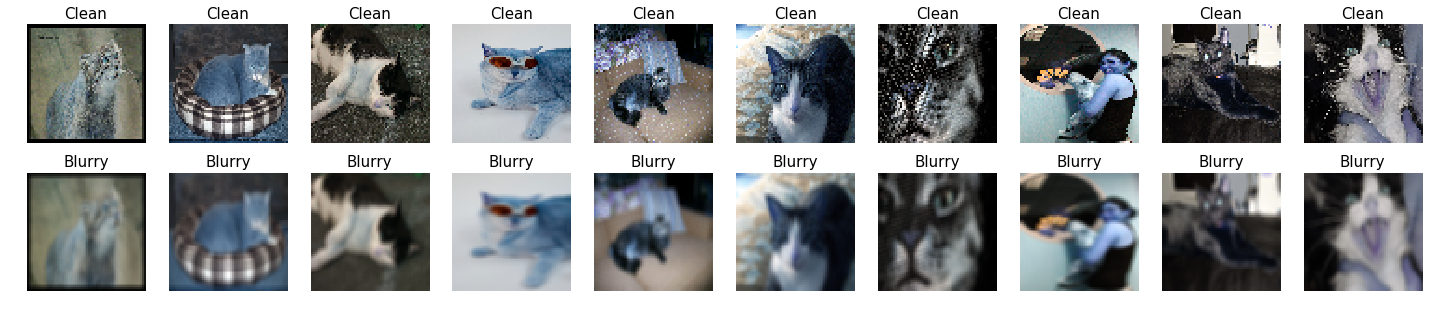

In [9]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow(X_train['data'][i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(X_train['blur_data'][i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

** Defining CNN Model for Training Model **

The model has been trained on a much larger dataset of CelebA images.

In [10]:
deblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )

In [11]:
deblur_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 320)       0         
__________

In [12]:
def plot_loss(train,valid):
    fig,ax = plt.subplots()     
    plt.xlabel('Training epoches')  
    plt.ylabel('Loss values')    
    x = range(len(train))

    ax.plot(x,train,'g',label = 'train set')
    ax.plot(x,valid,'r',label = 'validation set')
    plt.grid(True)  
    plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)  
    plt.show()
    plt.pause(0.001)

In [13]:
adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer= adam, loss= 'mean_squared_error')


In [14]:
#hist = deblur_CNN.fit( X_train['blur_data'],X_d,batch_size=16, validation_data=(X_validation['blur_data'],X_d_val),epochs=10, )

In [15]:
#deblur_CNN.load_weights('cnn_weights.h5')
hist = deblur_CNN.fit( X_train['blur_data'],X_train['data'],batch_size=16, validation_data=(X_validation['blur_data'],X_validation['data']),epochs=80, )

Train on 4028 samples, validate on 503 samples
Epoch 1/80
4028/4028 [==============================] - 54s 13ms/step - loss: 13877.3446 - val_loss: 12734.9869
Epoch 2/80
4028/4028 [==============================] - 48s 12ms/step - loss: 12753.3734 - val_loss: 12051.5165
Epoch 3/80
4028/4028 [==============================] - 48s 12ms/step - loss: 11668.4542 - val_loss: 11280.9245
Epoch 4/80
4028/4028 [==============================] - 49s 12ms/step - loss: 10660.6927 - val_loss: 10643.7715
Epoch 5/80
4028/4028 [==============================] - 48s 12ms/step - loss: 9724.4514 - val_loss: 9812.6274
Epoch 6/80
4028/4028 [==============================] - 48s 12ms/step - loss: 8907.3882 - val_loss: 9033.1264
Epoch 7/80
4028/4028 [==============================] - 48s 12ms/step - loss: 8176.6200 - val_loss: 8545.4651
Epoch 8/80
4028/4028 [==============================] - 48s 12ms/step - loss: 7505.1992 - val_loss: 7506.6589
Epoch 9/80
4028/4028 [==============================] - 48s 12ms/

4028/4028 [==============================] - 49s 12ms/step - loss: 910.1798 - val_loss: 902.1764
Epoch 75/80
4028/4028 [==============================] - 49s 12ms/step - loss: 904.7909 - val_loss: 903.6240
Epoch 76/80
4028/4028 [==============================] - 49s 12ms/step - loss: 905.0246 - val_loss: 910.8984
Epoch 77/80
4028/4028 [==============================] - 49s 12ms/step - loss: 898.1325 - val_loss: 885.3017
Epoch 78/80
4028/4028 [==============================] - 49s 12ms/step - loss: 892.0285 - val_loss: 886.9550
Epoch 79/80
4028/4028 [==============================] - 49s 12ms/step - loss: 890.2043 - val_loss: 892.5042
Epoch 80/80
4028/4028 [==============================] - 49s 12ms/step - loss: 888.8314 - val_loss: 894.3325


In [16]:
print(hist.history)

{'val_loss': [12734.98688727013, 12051.516457893265, 11280.924468812127, 10643.771536794857, 9812.627403547465, 9033.126430867918, 8545.465059253851, 7506.658921471173, 6753.553100343253, 6570.889827053305, 5978.51166341793, 5415.063860974777, 4901.493447518017, 5049.64745608381, 4151.960865665383, 3796.544827713407, 3552.4080084920165, 3155.4495376374566, 2773.7484492459307, 2777.86849120123, 2481.141288984841, 2260.8609563323184, 2127.4097383472604, 1856.6189882191227, 1857.0854686335115, 1710.284608996412, 1672.2216981315235, 1529.5676029273577, 1546.480197428709, 1529.19928160529, 1431.3708925645346, 1375.820767533471, 1343.7845077969682, 1313.9486066996458, 1301.6699342519105, 1332.7993232014164, 1263.6908648208405, 1233.0843767958654, 1212.657655871412, 1253.710348504675, 1195.266762219651, 1163.247720707008, 1153.589257909574, 1156.839640380374, 1104.3019636089712, 1120.5595127962692, 1148.9947444240804, 1065.4431581895346, 1070.4122901749658, 1055.8177490234375, 1053.2314436137

In [17]:
f = open('val_loss.txt','a')
for i in hist.history['val_loss']:
    f.write(str(i)+'\n')
f.close()
f = open('train_loss.txt','a')
for i in hist.history['loss']:
    f.write(str(i)+'\n')
f.close()

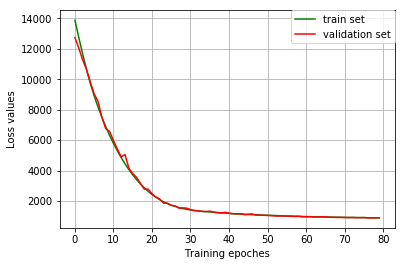

In [18]:
with open('val_loss.txt', 'r') as f:  
    data = f.readlines() 
    val = [float(i) for i in data]
with open('train_loss.txt', 'r') as f:  
    data = f.readlines() 
    train = [float(i) for i in data]
plot_loss(train,val) 

In [19]:
#deblur_CNN.load_weights('cnn_weights.h5')
#X_test = pk.load("test.gz")


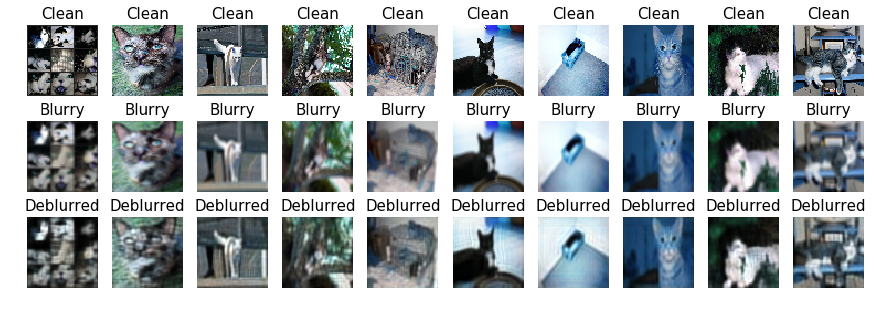

In [20]:
Deblurred = deblur_CNN.predict(X_test['blur_data'])
Deblurred = np.clip(Deblurred, 0, 255)
Deblurred=Deblurred.astype(np.uint8)
f, ax = plt.subplots(3,10, figsize=(15,5))
for i in range(10):
    ax[0,i].imshow(X_test['data'][i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(X_test['blur_data'][i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
    ax[2,i].imshow(Deblurred[i].astype('uint8'));  ax[2,i].axis('Off'); ax[2,i].set_title('Deblurred', size=15)
plt.show()

In [21]:
deblur_CNN.save_weights('weights_7_80_11_20_21_20.h5')

In [22]:
X_deblur = {"data":Deblurred, "label":X_test['label']}

In [23]:
pk.dump(X_deblur, "Deblurred_step_for21.gz", overwrite=False)


Dump to 'Deblurred_step_for21.gz' ...
    Complete! Elapse 0.315064 sec.


In [24]:
pk.dump(X_deblur, "Deblurred_step_for21.gz", overwrite=True)


Dump to 'Deblurred_step_for21.gz' ...
    Complete! Elapse 0.303254 sec.


In [25]:
from keras.utils import plot_model
import graphviz

In [26]:
plot_model(deblur_CNN, to_file='model.png')

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.